<a href="https://colab.research.google.com/github/bennycohen/Heleshaw/blob/Data-Organization/HeleShaw_File_Naming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID (replace with the ID of the folder you want to access)
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Name of the file you want to rename
target_file_name = "OLD NAME"

# New name you want to set
new_file_name = "NewName"

# Query to list files in the folder
query = f"'{folder_id}' in parents"
results = drive_service.files().list(q=query).execute()
items = results.get('files', [])

# Loop through each file to find the file you want to rename
for item in items:
    if item['name'] == target_file_name:
        # File found, rename it
        file_id = item['id']
        update_body = {'name': new_file_name}
        updated_file = drive_service.files().update(fileId=file_id, body=update_body).execute()
        print(f"Renamed file to: {updated_file['name']}")
        break
else:
    print("File not found.")


Renamed file to: NewName


In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID (replace with the ID of the folder you want to access)
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Create a list to store file names
file_names = []

# Initialize page token to None for the first query
page_token = None

# Loop to fetch files with pagination
while True:
    # Query to list files
    query = f"'{folder_id}' in parents"
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    # Add file names to the list
    for item in items:
        file_names.append(item['name'])

    # Update the page token for the next query
    page_token = results.get('nextPageToken', None)

    if page_token is None:
        break

# Print the number of files in the file_names list
print(f"Total number of files: {len(file_names)}")


Total number of files: 1276


In [ ]:
import cv2

def get_video_dimensions(video_path):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video file.")
        return None

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    cap.release()

    return width, height

video_path = '/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230707_6.0_5.926768_H2_1_1_O2_10.971_10.858466_N2_down_0.5_1200_30_1_S0001.avi'
dimensions = get_video_dimensions(video_path)

if dimensions:
    width, height = dimensions
    print(f"Video dimensions: {width}x{height}")


Video dimensions: 100x928


In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Query to list files in the folder
query = f"'{folder_id}' in parents"
results = drive_service.files().list(q=query).execute()
items = results.get('files', [])

# Loop through each file to rename it
for item in items:
    old_file_name = item['name']
    if old_file_name.endswith('.avi'):
        # Parsing the old filename
        parts = old_file_name.split(' ')
        copy11, of11, rest11 = parts

        # Formatting the new filename
        new_file_name = f"Date:{rest11}"

        # Renaming the file
        file_id = item['id']
        update_body = {'name': new_file_name}
        updated_file = drive_service.files().update(fileId=file_id, body=update_body).execute()
        print(f"Renamed file to: {updated_file['name']}")






ValueError: ignored

In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Initialize page token to None for the first query
page_token = None

while True:
    # Query to list files in the folder
    query = f"'{folder_id}' in parents"
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    # Loop through each file to rename it
    for item in items:
        old_file_name = item['name']
        if old_file_name.startswith('Copy of'):
            # Parsing the old filename
            parts = old_file_name.split(' ')
            copy11, of11, rest11 = parts

            # Formatting the new filename
            new_file_name = f"Date:{rest11}"
            # Renaming the file
            file_id = item['id']
            update_body = {'name': new_file_name}
            updated_file = drive_service.files().update(fileId=file_id, body=update_body).execute()
            print(f"Renamed file to: {updated_file['name']}")

    # Update the page token for the next query
    page_token = results.get('nextPageToken', None)

    if page_token is None:
        break


Renamed file to: Date:20230606_4.0_3.935185_H2_1_1_O2_12.875_12.71194_N2_down_0.5_1200_30_1_S0001.avi
Renamed file to: Date:20230606_1.4_1.386918_H2_1_1_O2_10.029_9.882361_N2_down_0.5_1200_30_2_S0001.avi
Renamed file to: Date:20230606_1.0_1.015224_H2_1_1_O2_6.8605_6.948081_N2_down_0.5_1200_30_1_S0001.avi
Renamed file to: Date:20230606_1.8_1.767801_H2_1_1_O2_13.197_13.048816_N2_down_0.5_1200_30_1_S0001.avi
Renamed file to: Date:20230606_3.0_2.989436_H2_1_1_O2_13.829_13.802303_N2_down_0.5_1200_30_2_S0001.avi
Renamed file to: Date:20230606_1.4_1.386918_H2_1_1_O2_10.029_9.882361_N2_down_0.5_1200_30_1_S0001.avi
Renamed file to: Date:20230606_3.0_2.989436_H2_1_1_O2_13.829_13.802303_N2_down_0.5_1200_30_1_S0001.avi
Renamed file to: Date:20230612_5.0_5.003896_H2_1_1_O2_10.056_10.024625_N2_down_0.5_1300_60_2_S0001.avi
Renamed file to: Date:20230607_1.6_1.599724_H2_1_1_O2_11.613_11.661098_N2_down_0.5_1200_30_1_S0001.avi
Renamed file to: Date:20230607_0.4_0.395774_H2_1_1_O2_2.109_2.105905_N2_down_

In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Initialize page token to None for the first query
page_token = None

while True:
    # Query to list files in the folder
    query = f"'{folder_id}' in parents"
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    # Loop through each file to rename it
    for item in items:
        old_file_name = item['name']
        if old_file_name.startswith('Date'):
            # Parsing the old filename
            parts = old_file_name.split('_')
            date, h2d, h2m, hname, o2d, o2m, oname, n2d, n2m, nname, orient, thickness, tad, fps, take, ending = parts
#Date:20230818_0.6_0.591272_H2_1_1_O2_6.526_6.497839_N2_horiz_0.25_900_5_1_S0001.avi
#Date:20230818  T_ad:1200K   X_O2d:1.00000   X_O2m:1.00000   X_H2d:4.20000   X_H2m:4.15752   X_N2d:12.68500   X_N2m:12.52530   X_CH4d:0.00000   X_CH4m:0.00000   X_NH3d:0.00000   X_NH3m:0.00000   Pitch:00.0°   Roll:00.0°   Size:42.00x18.00x00.25   FPS:30   Take:002  .avi


            # Determine Pitch and Roll based on 'horiz'
            if orient == "horiz":
                pitch_roll = "Pitch:+00.0°   Roll:00.0°"
            elif orient == "up":
                pitch_roll = "Pitch:+90.0°   Roll:00.0°"
            elif orient == "down":
                pitch_roll = "Pitch:-90.0°   Roll:00.0°"
            else:
                pitch_roll = "Pitch:Unknown   Roll:Unknown"



            # Formatting the new filename
            new_file_name = f"Hele-Shaw Flame {date}  T_ad:{tad}K  Oxidizer X_O2d:{float(o2d):.6f} X_O2m:{float(o2m):.6f}  Fuel X_H2d:{float(h2d):.6f} X_H2m:{float(h2m):.6f}  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:{float(n2d):.6f} X_N2m:{float(n2m):.6f}  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  {pitch_roll}  Size:42.00x18.00x0{float(thickness):.2f}  FPS:{fps}  Take:00{take}  {ending}.avi"
            # Renaming the file
            file_id = item['id']
            update_body = {'name': new_file_name}
            updated_file = drive_service.files().update(fileId=file_id, body=update_body).execute()
            print(f"Renamed file to: {updated_file['name']}")

    # Update the page token for the next query
    page_token = results.get('nextPageToken', None)

    if page_token is None:
        break


Renamed file to: Hele-Shaw Flame Date:20230728  T_ad:1100K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.400000 X_H2m:0.400954  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:2.579500 X_N2m:2.586171  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+00.0°   Roll:00.0°  Size:42.00x18.00x00.12  FPS:30  Take:001  S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230728  T_ad:1100K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.400000 X_H2m:0.400954  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:2.579500 X_N2m:2.586171  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+00.0°   Roll:00.0°  Size:42.00x18.00x00.12  FPS:30  Take:002  S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230814  T_ad:1200K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:1.000000 X_H2m:1.002636  X_CH4d:0.000000 X_CH4m:0.0

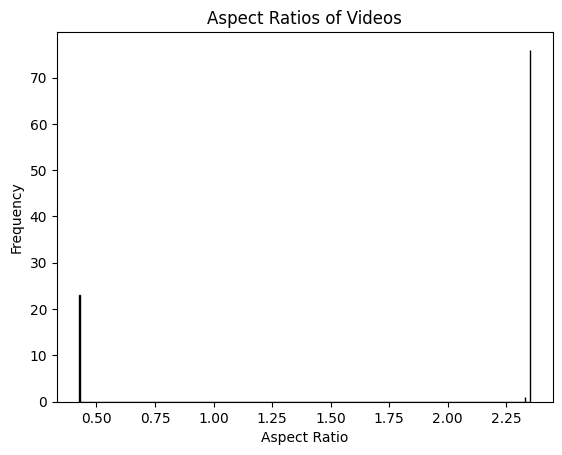

In [ ]:
import cv2
import matplotlib.pyplot as plt
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import io

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Function to get video dimensions
def get_video_dimensions(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return None
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height

# Query to list files in the folder
query = f"'{folder_id}' in parents"
results = drive_service.files().list(q=query).execute()
items = results.get('files', [])

aspect_ratios = []

# ... (previous code remains the same)

# Loop through each video file to get the aspect ratio
for item in items:
    simplified_name = item['name'][:50]  # Keeping only first 50 characters
    file_id = item['id']
    request = drive_service.files().get_media(fileId=file_id)

    with io.FileIO(f"{simplified_name}.avi", 'wb') as fh:
        downloader = MediaIoBaseDownload(fh, request)
        done = False
        while done is False:
            status, done = downloader.next_chunk()

    dimensions = get_video_dimensions(f"{simplified_name}.avi")

    if dimensions:
        width, height = dimensions
        aspect_ratio = width / height
        aspect_ratios.append(aspect_ratio)

# ... (rest of the code remains the same)


# Plotting the histogram
plt.hist(aspect_ratios, bins=1000, edgecolor='black')
plt.title('Aspect Ratios of Videos')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()



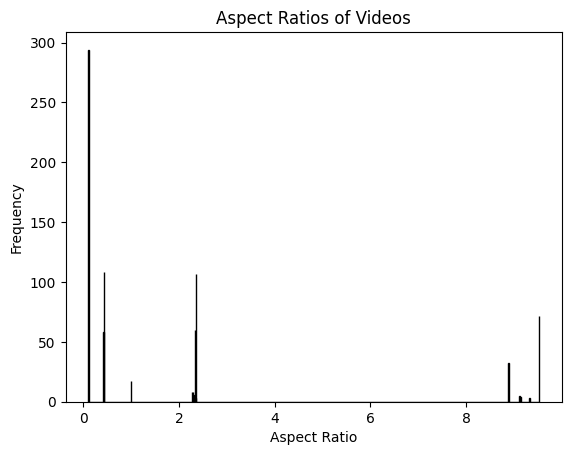

In [ ]:
import cv2
import matplotlib.pyplot as plt
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import io

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Function to get video dimensions
def get_video_dimensions(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return None
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height

# Query to list files in the folder
query = f"'{folder_id}' in parents"

# Initialize variables for paginated query
page_token = None
aspect_ratios = []

while True:
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    # Loop through each video file to get the aspect ratio
    for item in items:
        simplified_name = item['name'][:50]  # Keeping only first 50 characters
        file_id = item['id']
        request = drive_service.files().get_media(fileId=file_id)

        with io.FileIO(f"{simplified_name}.avi", 'wb') as fh:
            downloader = MediaIoBaseDownload(fh, request)
            done = False
            while done is False:
                status, done = downloader.next_chunk()

        dimensions = get_video_dimensions(f"{simplified_name}.avi")

        if dimensions:
            width, height = dimensions
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

    # Check for more files (pagination)
    page_token = results.get('nextPageToken', None)
    if page_token is None:
        break

# Plotting the histogram
plt.hist(aspect_ratios, bins=1000, edgecolor='black')
plt.title('Aspect Ratios of Videos')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import re

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID (replace with the ID of the folder you want to access)
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Query to list files in the folder
query = f"'{folder_id}' in parents"
results = drive_service.files().list(q=query).execute()
items = results.get('files', [])

# Regular expression to find T_ad values
pattern = re.compile(r'T_ad:(\d{3})K')

# Loop through each file to find the file names with 3-digit T_ad values
for item in items:
    file_name = item['name']
    match = pattern.search(file_name)

    if match:
        # Extract the 3-digit T_ad value
        three_digit_value = match.group(1)

        # Convert to 4-digit by padding with a leading zero
        four_digit_value = f"0{three_digit_value}"

        # Replace in the original file name
        new_file_name = file_name.replace(f"T_ad:{three_digit_value}K", f"T_ad:{four_digit_value}K")

        # Update the file name in Google Drive
        file_id = item['id']
        update_body = {'name': new_file_name}
        updated_file = drive_service.files().update(fileId=file_id, body=update_body).execute()
        print(f"Renamed file to: {updated_file['name']}")

else:
    print("Finished processing files.")


Renamed file to: Hele-Shaw Flame Date:20230628  T_ad:0900K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.201592  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:1.471000 X_N2m:1.473961  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+00.0°   Roll:00.0°  Size:42.00x18.00x00.50  FPS:10  Take:002  S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230628  T_ad:0900K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.201592  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:1.471000 X_N2m:1.473961  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+00.0°   Roll:00.0°  Size:42.00x18.00x00.50  FPS:10  Take:003  S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230525  T_ad:0850K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.200033  X_CH4d:0.000000 X_CH4m:0.0

In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import re

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID (replace with the ID of the folder you want to access)
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Query to list files in the folder
query = f"'{folder_id}' in parents"

# Initialize the page token for pagination
page_token = None

while True:
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    # Regular expression to find T_ad values
    pattern = re.compile(r'T_ad:(\d{3})K')

    # Loop through each file to find the file names with 3-digit T_ad values
    for item in items:
        file_name = item['name']
        match = pattern.search(file_name)

        if match:
            # Extract the 3-digit T_ad value
            three_digit_value = match.group(1)

            # Convert to 4-digit by padding with a leading zero
            four_digit_value = f"0{three_digit_value}"

            # Replace in the original file name
            new_file_name = file_name.replace(f"T_ad:{three_digit_value}K", f"T_ad:{four_digit_value}K")

            # Update the file name in Google Drive
            file_id = item['id']
            update_body = {'name': new_file_name}
            updated_file = drive_service.files().update(fileId=file_id, body=update_body).execute()
            print(f"Renamed file to: {updated_file['name']}")

    # Check if there are more files to process
    page_token = results.get('nextPageToken', None)
    if page_token is None:
        break

print("Finished processing files.")


Renamed file to: Hele-Shaw Flame Date:20230620  T_ad:0900K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.198714  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:1.471000 X_N2m:1.472382  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+90.0°   Roll:00.0°  Size:42.00x18.00x00.50  FPS:10  Take:002  C001H001S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230620  T_ad:0900K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.198714  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:1.471000 X_N2m:1.472382  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+90.0°   Roll:00.0°  Size:42.00x18.00x00.50  FPS:10  Take:001  C001H001S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230620  T_ad:0850K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.400000 X_H2m:0.399950  X_CH4d:0.0

In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import re

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID (replace with the ID of the folder you want to access)
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Query to list files in the folder
query = f"'{folder_id}' in parents"

# Initialize the page token for pagination
page_token = None

while True:
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    # Regular expression to find specific values
    pattern_T_ad = re.compile(r'T_ad:(\d{3})K')
    pattern_N2 = re.compile(r'X_N2[d|m]:([0-9]{1}\.[0-9]+)')

    for item in items:
        file_name = item['name']

        # Process T_ad
        match_T_ad = pattern_T_ad.search(file_name)
        if match_T_ad:
            three_digit_value = match_T_ad.group(1)
            four_digit_value = f"0{three_digit_value}"
            file_name = file_name.replace(f"T_ad:{three_digit_value}K", f"T_ad:{four_digit_value}K")

        # Process X_N2d and X_N2m
        matches_N2 = pattern_N2.findall(file_name)
        for match in matches_N2:
            if len(match.split('.')[0]) == 1:
                new_value = f"0{match}"
                file_name = file_name.replace(f":{match}", f":{new_value}")

        # Update the file name in Google Drive
        file_id = item['id']
        update_body = {'name': file_name}
        updated_file = drive_service.files().update(fileId=file_id, body=update_body).execute()
        print(f"Renamed file to: {updated_file['name']}")

    # Check for more files
    page_token = results.get('nextPageToken', None)
    if page_token is None:
        break

print("Finished processing files.")


Renamed file to: Hele-Shaw Flame Date:20230525  T_ad:0850K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.200033  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:01.729500 X_N2m:01.733402  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+00.0°   Roll:00.0°  Size:42.00x18.00x00.50  FPS:10  Take:002  S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230525  T_ad:0900K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.200033  X_CH4d:0.000000 X_CH4m:0.000000  X_NH3d:0.000000 X_NH3m:0.000000  Diluent X_N2d:01.471000 X_N2m:01.480601  X_Ard:0.000000 X_Arm:0.000000  X_Hed:0.000000 X_Hem:0.000000  X_CO2d:0.000000 X_CO2m:0.000000  Pitch:+00.0°   Roll:00.0°  Size:42.00x18.00x00.50  FPS:30  Take:002  S0001.avi.avi
Renamed file to: Hele-Shaw Flame Date:20230525  T_ad:0850K  Oxidizer X_O2d:1.000000 X_O2m:1.000000  Fuel X_H2d:0.200000 X_H2m:0.200033  X_CH4d:0.000000 X_CH4m

In [ ]:
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from googleapiclient.http import MediaIoBaseDownload
import hashlib

# Your Google Drive API settings
SCOPES = ['https://www.googleapis.com/auth/drive']
SERVICE_ACCOUNT_FILE = '/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json'

# Authenticate and build the Drive API client
credentials = Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES)
drive_service = build('drive', 'v3', credentials=credentials)


def download_file(file_id, filepath):
    # Create a hash of the original filename for uniqueness
    file_hash = hashlib.md5(filepath.encode()).hexdigest()[:10]
    short_filepath = f"/tmp/{file_hash}.avi"

    request = drive_service.files().get_media(fileId=file_id)
    fh = io.FileIO(short_filepath, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
    return short_filepath  # return the shortened file path


# Function to process a frame
def process_frame(frame):
    # Your frame processing code here (flame detection)
    # Return proportion of frame occupied by flame
    return 0.5  # Placeholder, replace with your logic


# Download and process videos from Google Drive folder
# Download and process videos from Google Drive folder
def process_videos(folder_id):
    proportions_list = []
    page_token = None

    while True:
        query = f"'{folder_id}' in parents"
        results = drive_service.files().list(q=query, pageToken=page_token).execute()
        items = results.get('files', [])

        for item in items:
            print(f"Processing file {item['name']}...")

            short_filepath = download_file(item['id'], item['name'])

            cap = cv2.VideoCapture(short_filepath)
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                proportion = process_frame(frame)
                proportions_list.append(proportion)
            cap.release()

        page_token = results.get('nextPageToken', None)
        if page_token is None:
            break

    return proportions_list


# Plot histogram
def plot_histogram(proportions_list):
    plt.hist(proportions_list, bins=50, alpha=0.5, color='g', edgecolor='black')
    plt.title('Histogram of Flame Sizes')
    plt.xlabel('Proportion of Frame')
    plt.ylabel('Frequency')
    plt.show()

# Main function
if __name__ == '__main__':
    folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'  # Replace with your folder's ID
    proportions_list = process_videos(folder_id)
    plot_histogram(proportions_list)


AttributeError: ignored

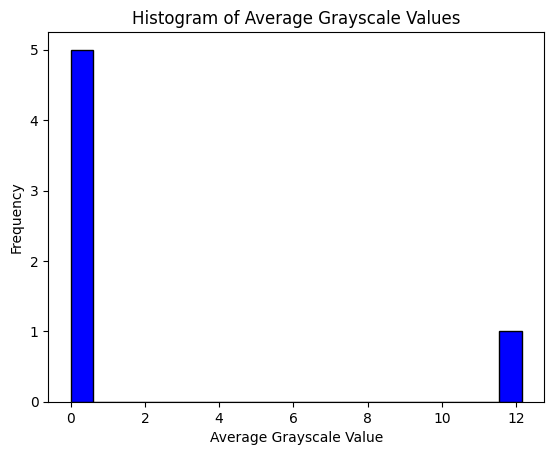

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate average grayscale value of a video
import cv2
import numpy as np

# Function to find percentage of pixels that remain black throughout the video
def get_black_pixel_percentage(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, first_frame = cap.read()
    if not ret:
        print("Failed to read video")
        return

    # Initialize black pixel mask
    black_pixel_mask = np.zeros_like(cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY))
    total_pixels = black_pixel_mask.size

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        black_pixels = (gray_frame == 0)

        # Update the mask
        black_pixel_mask[black_pixels] += 1

    cap.release()

    # Find the number of pixels that remained black throughout all frames
    black_count = np.count_nonzero(black_pixel_mask == black_pixel_mask.max())

    # Calculate and return percentage
    return (black_count / total_pixels) * 100

# Example usage

# Function to process multiple videos and plot histogram
def process_videos(video_paths):
    avg_values = []

    for video_path in video_paths:
        avg_value = get_black_pixel_percentage(video_path)
        avg_values.append(avg_value)

    # Plot histogram
    plt.hist(avg_values, bins=20, color='blue', edgecolor='black')
    plt.title("Histogram of Average Grayscale Values")
    plt.xlabel("Average Grayscale Value")
    plt.ylabel("Frequency")
    plt.show()

# Example usage
video_paths = ['/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/4.6 Copy of 20230731_0.4_0.40238_H2_1_1_O2_2.109_2.115157_N2_horiz_0.125_1200_30_1_S0001.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.4_1.406172_H2_1_1_O2_10.029_10.083784_N2_horiz_0.5_1200_30_2_S0001.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/4.5 20230814_0.2_0.199943_H2_1_1_O2_1.064_1.064331_N2_up_0.125_1000_10_3_S0001.avi', '/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.0_1.013493_H2_1_1_O2_6.866_6.950733_N2_horiz_0.5_1200_30_1_S0001.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.0_1.013493_H2_1_1_O2_6.866_6.950733_N2_horiz_0.5_1200_30_1_S0001_result.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.2_1.173010_H2_1_1_O2_8.445_8.380794_N2_horiz_0.5_1200_30_1_S0001.avi']  # Replace with the actual paths to your videos
process_videos(video_paths)


In [ ]:
import cv2

def print_video_dimensions(video_paths):
    for video_path in video_paths:
        # Open the video file
        cap = cv2.VideoCapture(video_path)

        # Check if the video file can be opened
        if not cap.isOpened():
            print(f"Unable to open {video_path}")
            continue

        # Get video dimensions
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        print(f"Video Name: {video_path.split('/')[-1]}, Dimensions: {width}x{height}")

        # Release the VideoCapture object
        cap.release()

# Example usage
video_paths = ['/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/4.6 Copy of 20230731_0.4_0.40238_H2_1_1_O2_2.109_2.115157_N2_horiz_0.125_1200_30_1_S0001.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.4_1.406172_H2_1_1_O2_10.029_10.083784_N2_horiz_0.5_1200_30_2_S0001.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/4.5 20230814_0.2_0.199943_H2_1_1_O2_1.064_1.064331_N2_up_0.125_1000_10_3_S0001.avi', '/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.0_1.013493_H2_1_1_O2_6.866_6.950733_N2_horiz_0.5_1200_30_1_S0001.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.0_1.013493_H2_1_1_O2_6.866_6.950733_N2_horiz_0.5_1200_30_1_S0001_result.avi','/content/drive/MyDrive/Flame Video Archive  Heleshaw 08282023/Copy of 20230522_1.2_1.173010_H2_1_1_O2_8.445_8.380794_N2_horiz_0.5_1200_30_1_S0001.avi']  # Replace with the actual paths to your videos

print_video_dimensions(video_paths)


Video Name: 4.6 Copy of 20230731_0.4_0.40238_H2_1_1_O2_2.109_2.115157_N2_horiz_0.125_1200_30_1_S0001.avi, Dimensions: 800x90
Video Name: Copy of 20230522_1.4_1.406172_H2_1_1_O2_10.029_10.083784_N2_horiz_0.5_1200_30_2_S0001.avi, Dimensions: 800x340
Video Name: 4.5 20230814_0.2_0.199943_H2_1_1_O2_1.064_1.064331_N2_up_0.125_1000_10_3_S0001.avi, Dimensions: 102x968
Video Name: Copy of 20230522_1.0_1.013493_H2_1_1_O2_6.866_6.950733_N2_horiz_0.5_1200_30_1_S0001.avi, Dimensions: 800x340
Video Name: Copy of 20230522_1.0_1.013493_H2_1_1_O2_6.866_6.950733_N2_horiz_0.5_1200_30_1_S0001_result.avi, Dimensions: 1598x506
Video Name: Copy of 20230522_1.2_1.173010_H2_1_1_O2_8.445_8.380794_N2_horiz_0.5_1200_30_1_S0001.avi, Dimensions: 800x340


In [ ]:
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import io
import re
import cv2
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from googleapiclient.http import MediaIoBaseDownload
import hashlib

# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# New function to get video dimensions
# Function to get video dimensions
def get_video_dimensions(video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height


# Query to list files in the folder
query = f"'{folder_id}' in parents"

# Initialize variables for paginated query
page_token = None

while True:
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    for item in items:
        dimensions = get_video_dimensions(item['name'])
        width, height = dimensions
        aspect_ratio = width / height

        if aspect_ratio < 0.25 or aspect_ratio > 8:
                        size_match = re.search(r"Size:(\d+\.\d+)x(\d+\.\d+)x(\d+\.\d+)", simplified_name)

                        if size_match:
                            old_height, old_width, old_thickness = size_match.groups()
                            new_width = "04.50"
                            new_size_str = f"Size:{old_height}x{new_width}x{old_thickness}"
                            new_title = re.sub(r"Size:\d+\.\d+x\d+\.\d+x\d+\.\d+", new_size_str, simplified_name)

                            update_request = drive_service.files().update(
                                fileId=file_id,
                                body={"name": new_title}
                            )
                            update_request.execute()

                            print(f"Changed name from {simplified_name} to {new_title}")

    page_token = results.get('nextPageToken', None)
    if page_token is None:
        break


ZeroDivisionError: ignored

In [ ]:
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import io
import re
import cv2
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from googleapiclient.http import MediaIoBaseDownload
import hashlib


# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Function to get video dimensions
def get_video_dimensions(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open {video_path}")
        return None
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return width, height

# Query to list files in the folder
query = f"'{folder_id}' in parents"

# Initialize variables for paginated query
page_token = None

while True:
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])

    for item in items:
        simplified_name = item['name']
        file_id = item['id']
        full_path = f"{simplified_name}.avi"

        dimensions = get_video_dimensions(f'/content/drive/MyDrive/USC Ph.D./Hele-Shaw/Flame Shape Classification (AE&D)/All Flame Videos/{full_path}')

        if dimensions is not None:
            width, height = dimensions
            aspect_ratio = width / height

            if aspect_ratio < 0.25 or aspect_ratio > 8:
                size_match = re.search(r"Size:(\d+\.\d+)x(\d+\.\d+)x(\d+\.\d+)", simplified_name)

                if size_match:
                    old_height, old_width, old_thickness = size_match.groups()
                    new_width = "04.50"
                    new_size_str = f"Size:{old_height}x{new_width}x{old_thickness}"
                    new_title = re.sub(r"Size:\d+\.\d+x\d+\.\d+x\d+\.\d+", new_size_str, simplified_name)

                    # Update file name in Google Drive
                    update_request = drive_service.files().update(
                        fileId=file_id,
                        body={"name": new_title}
                    )
                    update_request.execute()

                    print(f"Changed name from {simplified_name} to {new_title}")

    page_token = results.get('nextPageToken', None)
    if page_token is None:
        break



In [ ]:
from googleapiclient.http import MediaIoBaseDownload
from google.oauth2.service_account import Credentials
from googleapiclient.discovery import build
import re
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import hashlib


# Initialize the Drive API client
scopes = ['https://www.googleapis.com/auth/drive']
credentials = Credentials.from_service_account_file('/content/cpl-old-video-history-heleshaw-6ab3dae14ffb.json', scopes=scopes)
drive_service = build('drive', 'v3', credentials=credentials)

# Folder ID
folder_id = '1FQOVH3BsqFDY3t98eloJhEKRLdoqG_al'

# Query to list files in the folder
query = f"'{folder_id}' in parents"

# Initialize variables for paginated query
page_token = None

while True:
    results = drive_service.files().list(q=query, pageToken=page_token).execute()
    items = results.get('files', [])



def print_video_dimensions(video_paths):
    for video_path in video_paths:
        # Open the video file
        cap = cv2.VideoCapture(video_path)

        # Check if the video file can be opened
        if not cap.isOpened():
            print(f"Unable to open {video_path}")
            continue

        # Get video dimensions
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        print(f"Video Name: {video_path.split('/')[-1]}, Dimensions: {width}x{height}")

        # Release the VideoCapture object
        cap.release()


print_video_dimensions(item['name'])


KeyboardInterrupt: ignored